<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [50]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 74.6MB/s]


In [51]:
!unzip '/content/vehicle-dataset-from-cardekho.zip' && rm '/content/vehicle-dataset-from-cardekho.zip'

Archive:  /content/vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            
  inflating: car details v4.csv      


In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

In [53]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/car data.csv')
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [54]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [56]:
px.sunburst(data, path=['Fuel_Type', 'Car_Name'])

In [57]:
px.sunburst(data, path=['Seller_Type', 'Fuel_Type','Car_Name'])

Text(0, 0.5, 'USD')

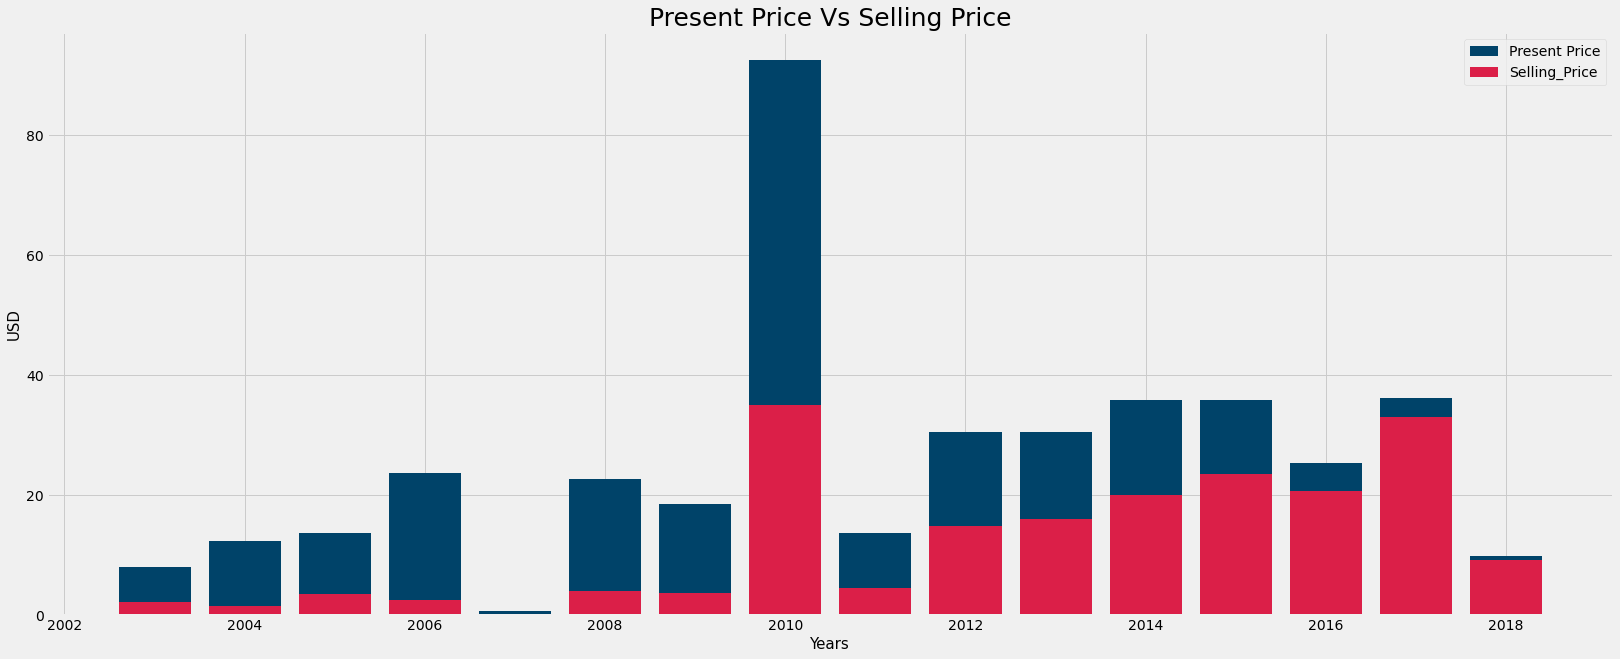

In [60]:
plt.figure(figsize=(25,10))
plt.bar(data['Year'], data['Present_Price'], label ='Present Price', color='#004369')
plt.bar(data['Year'], data['Selling_Price'], label = 'Selling_Price', color='#DB1F48')

plt.legend()
plt.title('Present Price Vs Selling Price', fontsize=25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('USD',fontsize=15)


In [59]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})
data['Transmission'] = data['Transmission'].map({'Manual':0,'Automatic':1})

<AxesSubplot:>

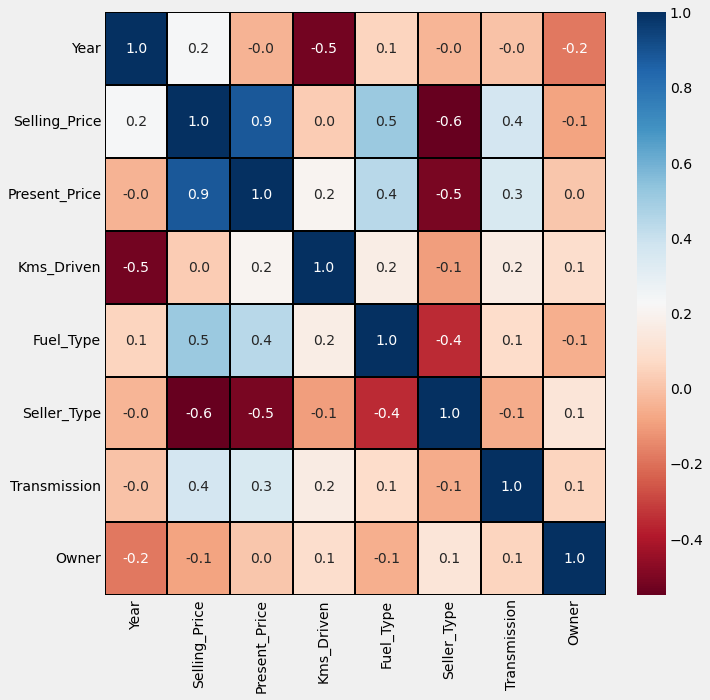

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), linecolor='black', linewidths=2, annot=True,fmt=".1f", cmap='RdBu')


# **ML Models**

In [68]:
x = np.array(data[['Year','Present_Price','Kms_Driven','Fuel_Type','Transmission']])
y = np.array(data['Selling_Price'])

In [69]:
print('x: ', x.shape,'\n','y: ',y.shape)

x:  (301, 5) 
 y:  (301,)


In [70]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [71]:
print('x_train: ', x_train.shape,'\n','y_train: ',y_train.shape)

x_train:  (240, 5) 
 y_train:  (240,)


In [72]:
print(
    "Year: ",data['Year'].min(), data['Year'].max(), '\n',
    "Present_Price: ", data['Present_Price'].min(),data['Present_Price'].max(),'\n',
    "Kms_Driven: ",data['Kms_Driven'].min(),data['Kms_Driven'].max(),'\n',
    "Fuel_Type: ",data['Fuel_Type'].min(),data['Fuel_Type'].max(),'\n',
    "Transmission: ",data['Transmission'].min(),data['Transmission'].max(),'\n',
)

Year:  2003 2018 
 Present_Price:  0.32 92.6 
 Kms_Driven:  500 500000 
 Fuel_Type:  0 2 
 Transmission:  0 1 



In [87]:
from sklearn.linear_model import LinearRegression

#feautures: Year:  2003 2018 , Present_Price:  0.32 92.6 , Kms_Driven:  500 500000 , Fuel_Type:  0 2 , Transmission:  0 1

features = np.array([[2012,30.61,104707,1,1]])

r = LinearRegression() 
r.fit(x_train,y_train)
lr = r.predict(features)
lr

array([16.85929836])

In [86]:
from sklearn.ensemble import RandomForestRegressor 

#feautures: Year:  2003 2018 , Present_Price:  0.32 92.6 , Kms_Driven:  500 500000 , Fuel_Type:  0 2 , Transmission:  0 1

features = np.array([[2012,30.61,104707,1,1]])

fr = RandomForestRegressor()
fr.fit(x_train,y_train)
rfr = fr.predict(features)
rfr

array([15.28])

In [85]:
from sklearn.svm import SVR

#feautures: Year:  2003 2018 , Present_Price:  0.32 92.6 , Kms_Driven:  500 500000 , Fuel_Type:  0 2 , Transmission:  0 1

features = np.array([[2012,30.61,104707,1,1]])

rs = SVR()
rs.fit(x_train,y_train)
SvR = rs.predict(features)
SvR

array([3.21612764])

In [84]:
from sklearn.neighbors import KNeighborsRegressor

#feautures: Year:  2003 2018 , Present_Price:  0.32 92.6 , Kms_Driven:  500 500000 , Fuel_Type:  0 2 , Transmission:  0 1

features = np.array([[2012,30.61,104707,1,1]])

rk = KNeighborsRegressor()
rk.fit(x_train,y_train)
knr = rk.predict(features)
knr

array([7.25])

In [83]:
data.iloc[50,]

Car_Name         fortuner
Year                 2012
Selling_Price        14.9
Present_Price       30.61
Kms_Driven         104707
Fuel_Type               1
Seller_Type             0
Transmission            1
Owner                   0
Name: 50, dtype: object